<a href="https://colab.research.google.com/github/farnazforooghi/G5dWO8HnyFw63JSR/blob/main/MainProject1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Project 1 : Happy Customer 

Background:

We are one of the fastest growing startups in the logistics and delivery domain. We work with several partners and make on-demand delivery to our customers. During the COVID-19 pandemic, we are facing several different challenges and everyday we are trying to address these challenges.

We thrive on making our customers happy. As a growing startup, with a global expansion strategy we know that we need to make our customers happy and the only way to do that is to measure how happy each customer is. If we can predict what makes our customers happy or unhappy, we can then take necessary actions.

Getting feedback from customers is not easy either, but we do our best to get constant feedback from our customers. This is a crucial function to improve our operations across all levels.

We recently did a survey to a select customer cohort. You are presented with a subset of this data. We will be using the remaining data as a private test set.


Data Description:

Y = target attribute (Y) with values indicating 0 (unhappy) and 1 (happy) customers (Happiness-status)

X1 = my order was delivered on time (Delivery-satisfaction)

X2 = contents of my order was as I expected ( Expectation-satisfaction)

X3 = I ordered everything I wanted to order ( order-satisfaction)

X4 = I paid a good price for my order (Price-satisfaction)

X5 = I am satisfied with my courier (Courier-satisfaction)

X6 = the app makes ordering easy for me (app-satisfaction)

Attributes X1 to X6 indicate the responses for each question and have values from 1 to 5 where the smaller number indicates less and the higher number indicates more towards the answer.

Goal(s):

Predict if a customer is happy or not based on the answers they give to questions asked.

Ensemble model :

Import libraries -> Read date ->date visualization -> preprocessing -> train  model(s) -> feature extraction

Selected models :
1. k-neighbour classifier ( KNN)
2. SVM (Support vector machine)
3. Random forest Classifier
reason of selection : As these models usually have higher accuracy for prediction

In [ ]:
from google.colab import files
 
 
uploaded = files.upload()

Saving ACME-HappinessSurvey2020.csv to ACME-HappinessSurvey2020.csv


In [ ]:
#importing useful libraries/modules for this project
import numpy as np 
import pandas as pd
import matplotlib.pyplot as mpl
import csv
from sklearn.model_selection import train_test_split
import random
import seaborn as sb
from sklearn.metrics import confusion_matrix, classification_report, f1_score

In [ ]:
#Read data
path = 'ACME-HappinessSurvey2020.csv'
data = pd.read_csv(path)
data.columns = ['Happiness Status' , 'Delivery-satisfaction' , 'Expectation-satisfaction' , 'order-satisfaction' , 'Price-satisfaction' , 'Courier-satisfaction','app-satisfaction' ]
data.head()

,Happiness Status,Delivery-satisfaction,Expectation-satisfaction,order-satisfaction,Price-satisfaction,Courier-satisfaction,app-satisfaction
0,0,3,3,3,4,2,4
1,0,3,2,3,5,4,3
2,1,5,3,3,3,3,5
3,0,5,4,3,3,3,5
4,0,5,4,3,3,3,5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Happiness Status          126 non-null    int64
 1   Delivery-satisfaction     126 non-null    int64
 2   Expectation-satisfaction  126 non-null    int64
 3   order-satisfaction        126 non-null    int64
 4   Price-satisfaction        126 non-null    int64
 5   Courier-satisfaction      126 non-null    int64
 6   app-satisfaction          126 non-null    int64
dtypes: int64(7)
memory usage: 7.0 KB


In [ ]:
#describtion of data
data.describe()

,Happiness Status,Delivery-satisfaction,Expectation-satisfaction,order-satisfaction,Price-satisfaction,Courier-satisfaction,app-satisfaction
count,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000,126.000000
mean,0.547619,4.333333,2.531746,3.309524,3.746032,3.650794,4.253968
std,0.499714,0.800000,1.114892,1.023440,0.875776,1.147641,0.809311
min,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,4.000000,2.000000,3.000000,3.000000,3.000000,4.000000
50%,1.000000,5.000000,3.000000,3.000000,4.000000,4.000000,4.000000
75%,1.000000,5.000000,3.000000,4.000000,4.000000,4.000000,5.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [ ]:
#mean/average calculator
# Reminder 0 is not happy and 1 is happy
data.groupby('Happiness Status').mean()

,Delivery-satisfaction,Expectation-satisfaction,order-satisfaction,Price-satisfaction,Courier-satisfaction,app-satisfaction
Happiness Status,,,,,,
0,4.087719,2.561404,3.140351,3.684211,3.368421,4.105263
1,4.536232,2.507246,3.449275,3.797101,3.884058,4.376812


In [ ]:
#display avg of each response in graph
def AnalyzeAtt (data, Colname) :
    #histogram 
    bins = np.arange(1,7) - 0.99
    mpl.hist(data[Colname],bins)
    mpl.title(Colname)
    mpl.show()
    
    #Display avg on bottom
    print (" Average for " + Colname + "value is ", data[Colname].mean())



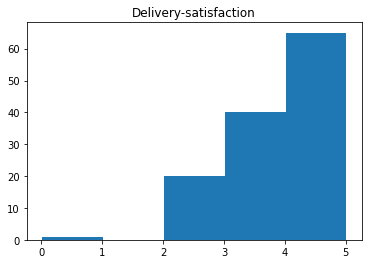

 Average for Delivery-satisfactionvalue is  4.333333333333333


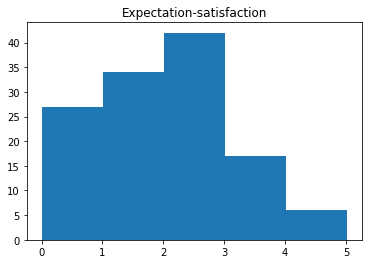

 Average for Expectation-satisfactionvalue is  2.5317460317460316


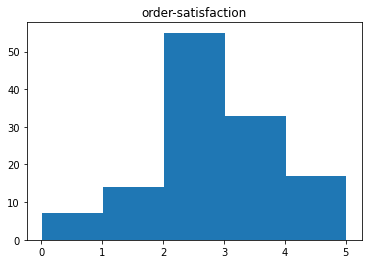

 Average for order-satisfactionvalue is  3.3095238095238093


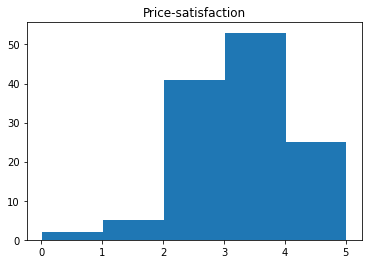

 Average for Price-satisfactionvalue is  3.746031746031746


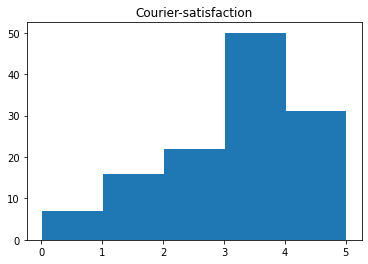

 Average for Courier-satisfactionvalue is  3.6507936507936507


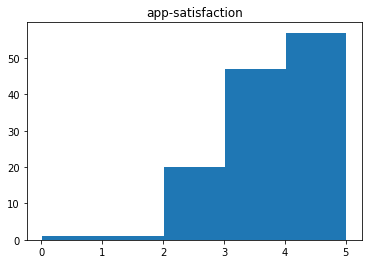

 Average for app-satisfactionvalue is  4.253968253968254


In [ ]:
for i in range(1,7) :
    AnalyzeAtt(data, data.columns[i])

PreProcessing 

which means we devide datas into 80 % (train) + 20 % (test)


In [ ]:
#initially devide data to X and Y column
X = data.drop(columns ='Happiness Status')
Y = data['Happiness Status']

#Split data for training the model
#using train_test_split function
xTrain,xTest,yTrain, yTest = train_test_split(X,Y, test_size = 0.2, random_state=0) 

#get the size of each column and row
print(xTrain.shape)
print(xTest.shape)
print(yTrain.shape)
print(yTest.shape)

(100, 6)
(26, 6)
(100,)
(26,)


Train Model

For this part, I used 3 different model based on reseach as these model has higher accuracy for prediction

1. K-neighbour Classifier ( KNN) 
2. SVM
3. Decision Tree

1. KNN model


this model create a boundry to classify data. The model will try to predict in the nearest boundry line
Hence larger K value means smoother curves of separation which results a less complex model.

10 0.7407407407407408


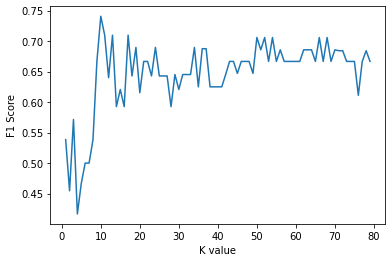

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#to get the best results, create a F1 score vs. K value graph to find approximate best K value
KinRange = range (1,80)
results =[]

# find a F1 score vs K - value graph to find the best K value 
for k in KinRange :
  KNN = KNeighborsClassifier(n_neighbors = k)
  KNN = KNN.fit (xTrain, yTrain)

  yPred = KNN.predict(xTest)

  results.append(f1_score(yTest, yPred))
  
# As code will print out the results value 9 as they starting K count from 0, hence we add +1 to results to get the accurate answer
#plot F1 Score vs K value 
mpl.plot(range(1,len(results)+1), results)
mpl.xlabel( "K value")
mpl.ylabel ("F1 Score")

# As code will print out the results value 9 as they starting K count from 0, hence we add +1 to results to get the accurate answer
print(results.index(max(results))+1, max(results)) 



Now recreate KNN model with Max F1 score where K = 10

              precision    recall  f1-score   support

           0       0.75      0.69      0.72        13
           1       0.71      0.77      0.74        13

    accuracy                           0.73        26
   macro avg       0.73      0.73      0.73        26
weighted avg       0.73      0.73      0.73        26

F1 Score  0.7407407407407408


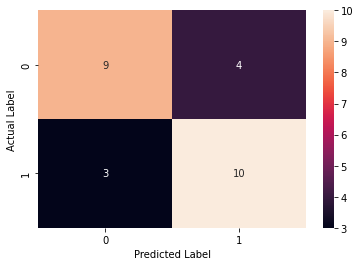

In [ ]:
KNN = KNeighborsClassifier(n_neighbors = 10)
KNN = KNN.fit(xTrain, yTrain)

yPred = KNN.predict(xTest)

    
    # Visualize classification report with precision, recall and F1 score
print(classification_report(yTest, yPred))

    # Create Confusion matrix vector
confMatrix = confusion_matrix(yTest, yPred)
dfConfMatrix = pd.DataFrame(confMatrix, index = [i for i in "01"], 
                                columns = [i for i in "01"])
    # Print F1 Score
print('F1 Score ', f1_score(yTest, yPred))
    
    # Plot Confusion matrix
sb.heatmap(dfConfMatrix, annot = True)
mpl.ylabel('Actual Label')
mpl.xlabel('Predicted Label')
mpl.show()

The accuracy of model is below 73% hence this model cannot be useful.


2. SVM model


This model takes the data and putput the hyperline a best separate place. It is known as decision boundry

The model is : Create model -> fit model -> make a prediction based on test data -> Results


              precision    recall  f1-score   support

           0       0.50      0.38      0.43        13
           1       0.50      0.62      0.55        13

    accuracy                           0.50        26
   macro avg       0.50      0.50      0.49        26
weighted avg       0.50      0.50      0.49        26

F1 Score  0.5517241379310345


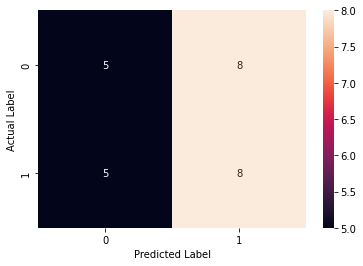

In [ ]:
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

#Creating model
SVMmodel = Pipeline([('scale', StandardScaler()),# mean = 0 and variance = 1
                  ('SVM', svm.SVC())])

#fitting model 
SVMmodel = SVMmodel.fit(xTrain, yTrain)

#Prediction
yPred = SVMmodel.predict(xTest)

#Results
    # Visualize classification report with precision, recall and F1 score
print(classification_report(yTest, yPred))

    # Create Confusion matrix vector
confMatrix = confusion_matrix(yTest, yPred)
dfConfMatrix = pd.DataFrame(confMatrix, index = [i for i in "01"], 
                                columns = [i for i in "01"])
    # Print F1 Score
print('F1 Score ', f1_score(yTest, yPred))
    
    # Plot Confusion matrix
sb.heatmap(dfConfMatrix, annot = True)
mpl.ylabel('Actual Label')
mpl.xlabel('Predicted Label')
mpl.show()

The accuracy of model is below 73% hence this model cannot be useful.


3. Random Forest model




              precision    recall  f1-score   support

           0       0.55      0.46      0.50        13
           1       0.53      0.62      0.57        13

    accuracy                           0.54        26
   macro avg       0.54      0.54      0.54        26
weighted avg       0.54      0.54      0.54        26

F1 Score  0.5714285714285715


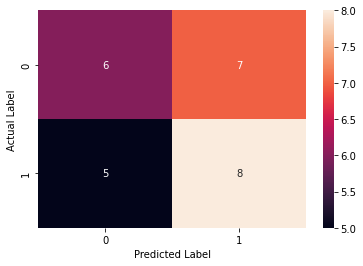

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RandomModel = RandomForestClassifier()
RandomModel = RandomModel.fit(xTrain, yTrain)

yPred = RandomModel.predict(xTest)

#Results
    # Visualize classification report with precision, recall and F1 score
print(classification_report(yTest, yPred))

    # Create Confusion matrix vector
confMatrix = confusion_matrix(yTest, yPred)
dfConfMatrix = pd.DataFrame(confMatrix, index = [i for i in "01"], 
                                columns = [i for i in "01"])
    # Print F1 Score
print('F1 Score ', f1_score(yTest, yPred))
    
    # Plot Confusion matrix
sb.heatmap(dfConfMatrix, annot = True)
mpl.ylabel('Actual Label')
mpl.xlabel('Predicted Label')
mpl.show()

Conclusion :      

Based on 3 models, KNN model has the highest accuracy of 73 %